<a href="https://colab.research.google.com/github/Jibby2k1/ML4Music/blob/main/Stage_2_RNN_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### README:

First, this notebook is only possible because of online resources, specifically Christopher Olah, Andrej Karpathy, and Josh Starmer. For their resources, refer to the following links:

https://colah.github.io/posts/2015-08-Understanding-LSTMs/


https://karpathy.github.io/2015/05/21/rnn-effectiveness/


https://youtu.be/AsNTP8Kwu80?si=sb7zpKAz5q48_9Bu

https://www.deeplearningbook.org/contents/rnn.html

This is a notebook describing the few experiments and usage of python for implementing LSTM Architecture RNNs on audio data.

We will mostly be using Tensorflow, which is built into Google Colab:

https://www.tensorflow.org/guide

Problem:

https://en.wikipedia.org/wiki/Signal_separation

https://en.wikipedia.org/wiki/Cocktail_party_effect


Methods:

https://en.wikipedia.org/wiki/Principal_component_analysis

https://en.wikipedia.org/wiki/Signal_separation

https://en.wikipedia.org/wiki/Independent_component_analysis

https://en.wikipedia.org/wiki/Dependent_component_analysis

https://en.wikipedia.org/wiki/Non-negative_matrix_factorization

http://www.bioinf.jku.at/publications/older/2704.pdf (Low-complexity coding and decoding)

https://en.wikipedia.org/wiki/Stationary_subspace_analysis

https://en.wikipedia.org/wiki/Common_spatial_pattern

https://en.wikipedia.org/wiki/Canonical_correlation

Related:

https://en.wikipedia.org/wiki/Adaptive_filter



Convolutive Mixtures

Blind Source Separation

Andzrej Cichonki

### Introduction:


Blind Signal Processing problems generally are based on an observed/sampled signal $\vec x(t)$, with the objective to find a *reconstruction system* that estimates the source signals $\vec s(t)$ from which $\vec x(t)$ was sampled. Estimating $\vec s(t)$ requires sampled signal $\vec x(t)$, output signal $\vec y(t)$, and some a-priori knowledge of the mix, with $\vec y(t) = \vec {\hat {s}} (t)$, meaning that the output signal is also an approximation of the input signal. This process can be decomposed into ICA, BSS, BSE, and MBD.

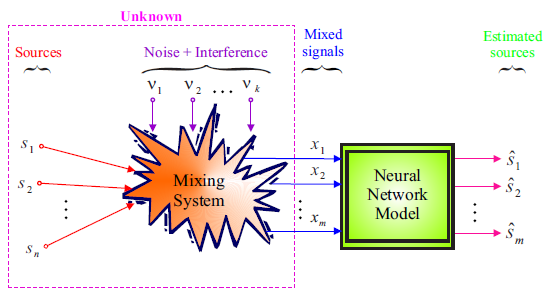

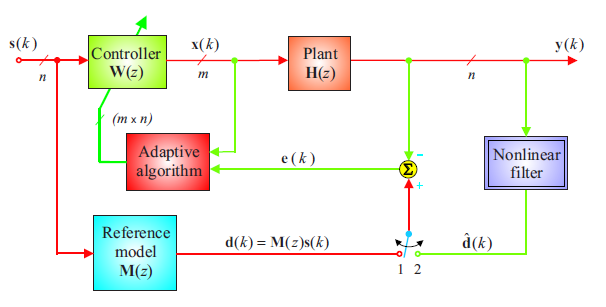

$ \vec x(t) = H \vec s(t) + \vec v(t)$

$ \vec x(t) $ is a vector of sensed signals

$ \vec v(t) $ is a vector of added noise

$ \textbf{H} $ is an unknown mixing matrix.

It is assumed that the sources are time-varying, zero-mean, statistically independent and unknown.

To solve this problem, we try to identify a separating matrix W such that

$ \vec y(t) = \textbf{W} \vec x(t)$

$ \textbf{W} $ is a separating matrix

$ \vec y(t) $ is the output signal vector such that components are as independent as possible.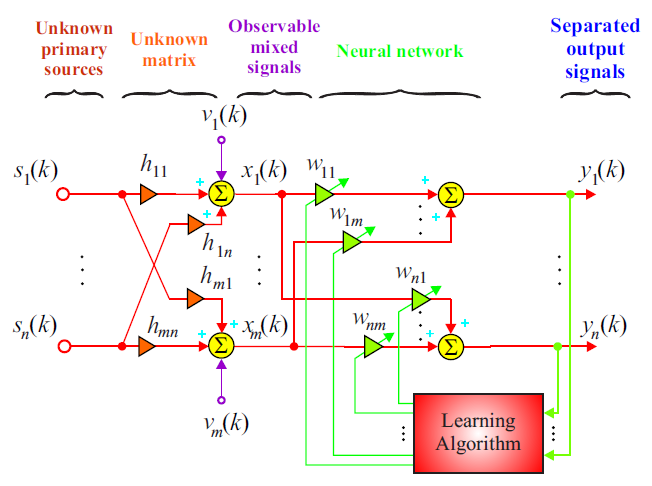

#### ICA

ICA of noisy random source vectors $\vec x(t)$ is obtained by finding $\textbf{W}$ defined by:

$ \vec y(t) = \textbf{W} \vec x(t)$

ICA is obtained by estimating both $\textbf{H}$ and the independent components $\vec s(t)$ defined by:

$ \vec x(t) = H \vec s(t) + \vec v(t)$

The *standard temporal ICA* task is formulated as the estimation of all the source signals and their mixing matrix where:

$ \textbf{X} = \textbf{H S}$

$ \textbf{X} = [x(1), ..., x(N)]^T \epsilon \mathcal{R}^{m \times N}$ where $N$ is a time, and $m$ is the number of source signals.

$ \textbf{S} = [s(1), ..., s(N)]^T \epsilon \mathcal{R}^{n \times N}$ where $N$ is a time, and $n$ is the number of source signals.

The *spatio-temporal ICA* is formatted as $ \textbf{X}^T = \textbf{S}^T \textbf{H}^T$ which is obtained by estimating S and H in a way that rows of S and columns of H are as independent as possible (and S and H contain similar statistical properties).

The *local ICA* preprocess raw sensor data by grouping them into clusters in space, frequency, or time-frequency domain, and then applying linear ICA to each cluster locally.

*Blind Signal Extraction* (BSE) is formulated as the problem of estimating one source or a select number of sources with particular properties.

***Note, ICA, BSS, and BSE may seem to be used interchangeably at time but they are differennt, specifically in how they are solved. ICA tend to use higher-order statistics (HOS assumes independence), while BSS use second order statistics (SOS assumes temporal structure). Also, HOS cannot be applied to Gaussian signals.

The estimation of separating matrix $ \textbf{W}$ and mixing matrix $\textbf{H}$ can be difficult in the presence of noise. Usually, the source signals and additive noise components are considered statistically independent.